In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn.decomposition import PCA
from skimage.color import rgb2gray
from skimage import io

(860, 1290, 3)


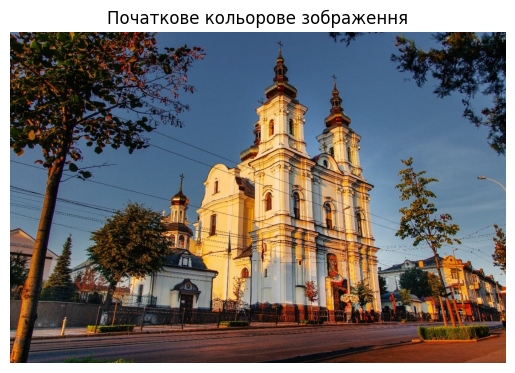

In [4]:
image_raw =imread("/Users/dlitvakk21/Downloads/coolpicture.jpg")
print(image_raw.shape)
plt.imshow(image_raw)
plt.title('Початкове кольорове зображення')
plt.show()

(860, 1290)
1.0


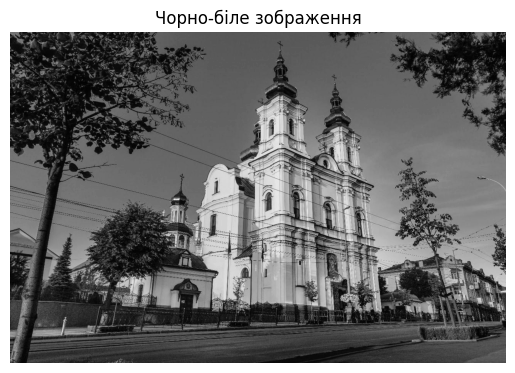

In [8]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum/image_sum.max()
print(image_bw.max())
image_bw = rgb2gray(image_raw)
plt.imshow(image_bw, cmap='gray')
plt.title('Чорно-біле зображення')
plt.show()


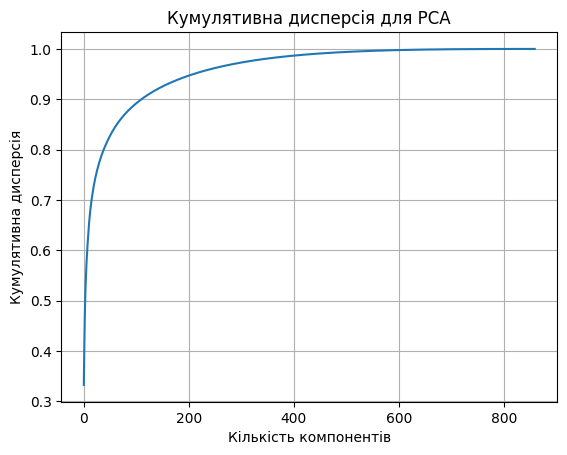

In [10]:
pca = PCA()
pca.fit(image_bw)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Кількість компонентів')
plt.ylabel('Кумулятивна дисперсія')
plt.title('Кумулятивна дисперсія для PCA')
plt.grid(True)
plt.show()

In [11]:
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print("Кількість компонентів для покриття 95% дисперсії:", components_needed)

Кількість компонентів для покриття 95% дисперсії: 210


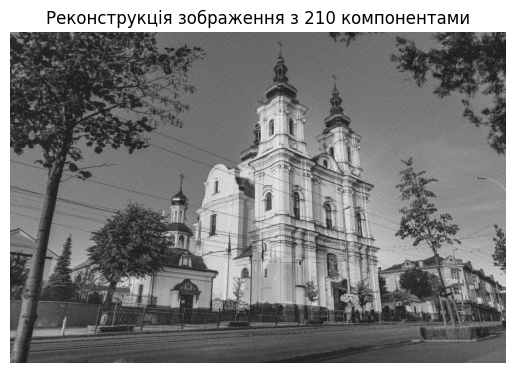

In [12]:
pca = PCA(n_components=components_needed)
image_bw_pca = pca.fit_transform(image_bw)
image_bw_reconstructed = pca.inverse_transform(image_bw_pca)
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.title(f'Реконструкція зображення з {components_needed} компонентами')
plt.axis('off')
plt.show()


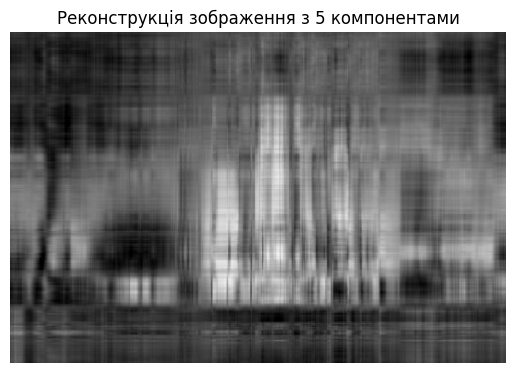

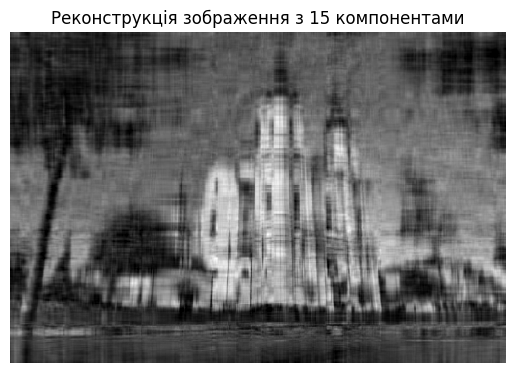

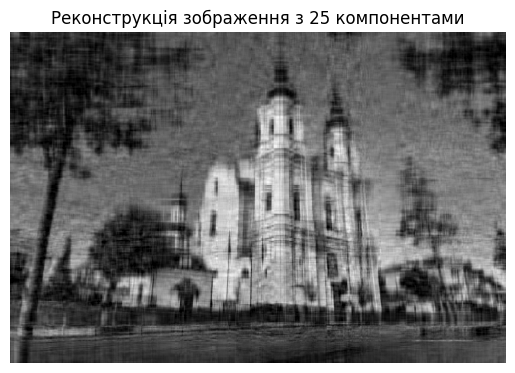

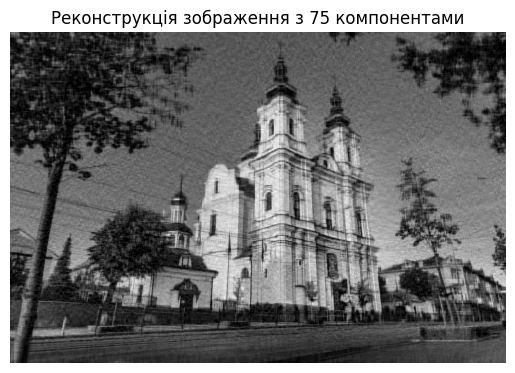

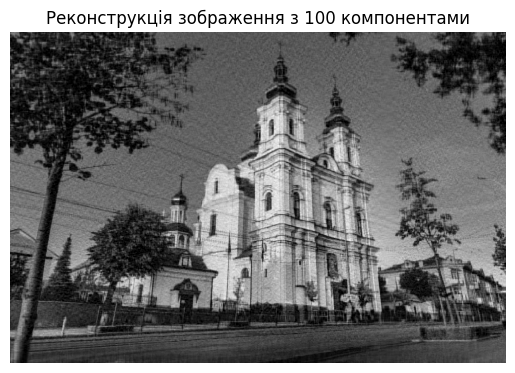

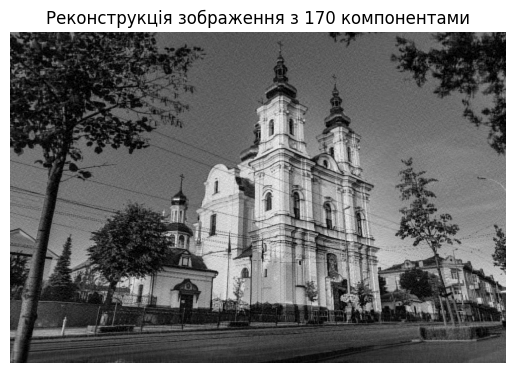

In [23]:
component_counts = [5, 15, 25, 75, 100, 170]

for n_components in component_counts:
    pca = PCA(n_components=n_components)
    image_bw_pca = pca.fit_transform(image_bw)
    image_bw_reconstructed = pca.inverse_transform(image_bw_pca)
    
    plt.imshow(image_bw_reconstructed, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Реконструкція зображення з {n_components} компонентами')
    plt.axis('off')
    plt.show()
